In [1]:
"""Naive_Bayes.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1nOYJttlMOKaKQpFYUq5huFjlIrvG0lHt
"""
import sys
sys.path.append(".")
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import classification_report
import datetime
import pandas as pd
import seaborn as sns; sns.set()
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
from sisa import SISA
import os
from sklearn.model_selection import train_test_split

### II. Multi-Label Classification with MNIST Dataset

In [2]:
# Mnist handwritten digits experiment

# Generate a random sample of 80% of the train data
train_df_2 = pd.read_csv('./MNIST/train.csv')
test_df_2 = pd.read_csv('./MNIST/test.csv')

train = train_df_2.sample(frac=0.8, replace=True, random_state=1)
X = train.iloc[:6667,1:]
y = train.label[:6667]
label = sorted(y.unique())

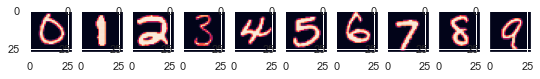

In [3]:
plt.figure(figsize=(9,9))
for i in label:
    plt.subplot(1,10, i+1)
    img = np.array( X[y==i][1:2] ).reshape(28,28)
    plt.imshow(img)

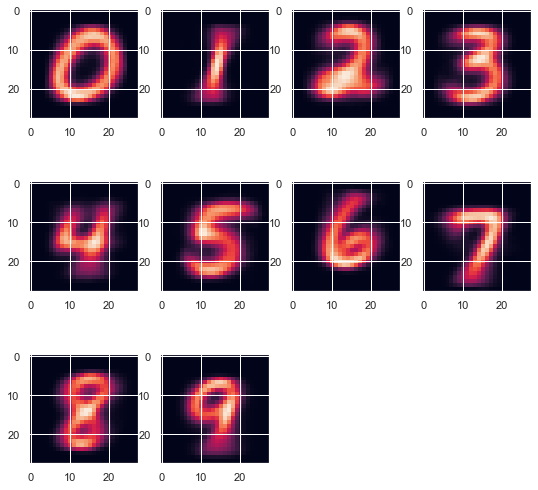

In [4]:
# Average Point of Every Class
m = y.unique().shape[0]
n = X.shape[1]

mu = np.zeros((m,n))
si = np.zeros((m,n))
for i in label:
    mu[i] = X[y==i].mean()
    si[i] = X[y==i].std()

plt.figure(figsize=(9,9))
for i in label:
    plt.subplot(3,4, i+1)
    img = np.array( mu[i] ).reshape(28,28)
    plt.imshow(img)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


### Experiment II. Control Group

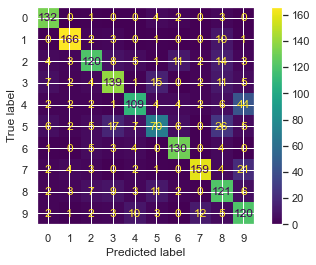

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       142
           1       0.91      0.91      0.91       183
           2       0.79      0.70      0.75       171
           3       0.76      0.75      0.75       186
           4       0.77      0.62      0.69       176
           5       0.64      0.49      0.55       144
           6       0.84      0.88      0.86       147
           7       0.90      0.81      0.85       196
           8       0.59      0.74      0.66       164
           9       0.59      0.76      0.66       158

    accuracy                           0.76      1667
   macro avg       0.76      0.76      0.76      1667
weighted avg       0.77      0.76      0.76      1667

Execution time: 513 ms
Naive Bayes accuracy score: 0.759448
Number of mislabeled points out of a total 1667 points in Naive Bayes: 401


In [6]:
 # 1000 Unlearning Requests
Cnb_1 = CategoricalNB(min_categories=256)
X_train_copy_1 = np.copy(X_train)
y_train_copy_1 = np.copy(y_train)
unlearn_req = []
N,D = X_train_copy_1.shape
start = datetime.datetime.now()
for i in range(1000):
    delete_row = np.random.choice(range(N), replace=False)
    X_train_copy_1 = np.delete(X_train_copy_1, delete_row, axis=0)
    y_train_copy_1 = np.delete(y_train_copy_1, delete_row, axis=0)
    Cnb_1.partial_fit(X_train_copy_1, y_train_copy_1, classes=np.unique(y_train_copy_1))
    N-=1

end = datetime.datetime.now()
diff = (end -start)
execution_time = diff.total_seconds() 
new_data_20_x = X_train_copy_1
new_data_20_y = y_train_copy_1
y_pred = Cnb_1.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(classification_report(y_test, y_pred))
print("Execution time: %d s" %(execution_time))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test.shape[0], (y_test != y_pred).sum()))

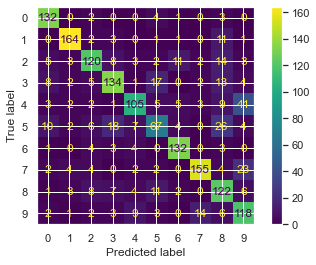

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       142
           1       0.91      0.90      0.90       183
           2       0.77      0.70      0.74       171
           3       0.76      0.72      0.74       186
           4       0.78      0.60      0.68       176
           5       0.60      0.47      0.52       144
           6       0.85      0.90      0.87       147
           7       0.88      0.79      0.83       196
           8       0.58      0.74      0.65       164
           9       0.59      0.75      0.66       158

    accuracy                           0.75      1667
   macro avg       0.75      0.75      0.75      1667
weighted avg       0.76      0.75      0.75      1667

Execution time: 1012 ms
Naive Bayes accuracy score: 0.749250
Number of mislabeled points out of a total 1667 points in Naive Bayes: 418


In [7]:
# 2000 Unlearning Requests
Cnb_1 = CategoricalNB(min_categories=256)
X_train_copy_1 = np.copy(X_train)
y_train_copy_1 = np.copy(y_train)
unlearn_req = []
N,D = X_train_copy_1.shape
start = datetime.datetime.now()
for i in range(2000):
    delete_row = np.random.choice(range(N), replace=False)
    X_train_copy_1 = np.delete(X_train_copy_1, delete_row, axis=0)
    y_train_copy_1 = np.delete(y_train_copy_1, delete_row, axis=0)
    Cnb_1.partial_fit(X_train_copy_1, y_train_copy_1, classes=np.unique(y_train_copy_1))
    N-=1
end = datetime.datetime.now()
diff = (end -start)
execution_time = diff.total_seconds() 
new_data_40_x = X_train_copy_1
new_data_40_y = y_train_copy_1
y_pred = Cnb_1.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(classification_report(y_test, y_pred))
print("Execution time: %d s" %(execution_time))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test.shape[0], (y_test != y_pred).sum()))

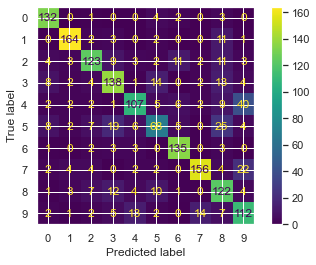

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       142
           1       0.91      0.90      0.90       183
           2       0.80      0.72      0.76       171
           3       0.73      0.74      0.73       186
           4       0.77      0.61      0.68       176
           5       0.62      0.47      0.54       144
           6       0.84      0.92      0.88       147
           7       0.89      0.80      0.84       196
           8       0.59      0.74      0.66       164
           9       0.59      0.71      0.64       158

    accuracy                           0.75      1667
   macro avg       0.76      0.75      0.75      1667
weighted avg       0.76      0.75      0.75      1667

Execution time: 1385 ms
Naive Bayes accuracy score: 0.754049
Number of mislabeled points out of a total 1667 points in Naive Bayes: 410


In [8]:
# 3000 Unlearning Requests
Cnb_1 = CategoricalNB(min_categories=256)
X_train_copy_1 = np.copy(X_train)
y_train_copy_1 = np.copy(y_train)
N,D = X_train_copy_1.shape
start = datetime.datetime.now()
for i in range(3000):
    delete_row = np.random.choice(range(N), replace=False)
    X_train_copy_1 = np.delete(X_train_copy_1, delete_row, axis=0)
    y_train_copy_1 = np.delete(y_train_copy_1, delete_row, axis=0)
    Cnb_1.partial_fit(X_train_copy_1, y_train_copy_1, classes=np.unique(y_train_copy_1))
    N-=1
end = datetime.datetime.now()
diff = (end -start)
execution_time = diff.total_seconds() 
new_data_60_x = X_train_copy_1
new_data_60_y = y_train_copy_1
y_pred = Cnb_1.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(classification_report(y_test, y_pred))
print("Execution time: %d s" %(execution_time))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test.shape[0], (y_test != y_pred).sum()))

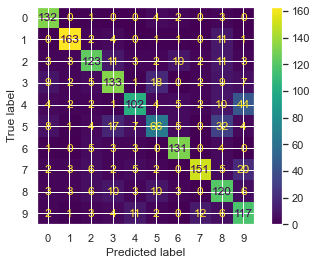

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       142
           1       0.92      0.89      0.90       183
           2       0.78      0.72      0.75       171
           3       0.72      0.72      0.72       186
           4       0.76      0.58      0.66       176
           5       0.61      0.46      0.52       144
           6       0.83      0.89      0.86       147
           7       0.89      0.77      0.83       196
           8       0.57      0.73      0.64       164
           9       0.58      0.74      0.65       158

    accuracy                           0.74      1667
   macro avg       0.75      0.74      0.74      1667
weighted avg       0.75      0.74      0.74      1667

Execution time: 1666 ms
Naive Bayes accuracy score: 0.742651
Number of mislabeled points out of a total 1667 points in Naive Bayes: 429


In [9]:
# 4000 Unlearning Requests
Cnb_1 = CategoricalNB(min_categories=256)
X_train_copy_1 = np.copy(X_train)
y_train_copy_1 = np.copy(y_train)
N,D = X_train_copy_1.shape
start = datetime.datetime.now()
for i in range(4000):
    delete_row = np.random.choice(range(N), replace=False)
    X_train_copy_1 = np.delete(X_train_copy_1, delete_row, axis=0)
    y_train_copy_1 = np.delete(y_train_copy_1, delete_row, axis=0)
    Cnb_1.partial_fit(X_train_copy_1, y_train_copy_1, classes=np.unique(y_train_copy_1))
    N-=1
end = datetime.datetime.now()
diff = (end -start)
execution_time = diff.total_seconds() 
new_data_80_x = X_train_copy_1
new_data_80_y = y_train_copy_1
y_pred = Cnb_1.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(classification_report(y_test, y_pred))
print("Execution time: %d s" %(execution_time))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test.shape[0], (y_test != y_pred).sum()))

In [11]:
X_train_copy_1 = np.copy(X_train)
y_train_copy_1 = np.copy(y_train)

#### Experiment I. 1 Shard 10 Slices 


In [12]:

sisa_1 = SISA(X_train, y_train, shards=1, slices=10, seed=123)
sisa_1.fit()
y_pred = sisa_1.predict(X_test, X_train, y_train)


Execution time for training Shard 0 : 1982 ms


/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


In [13]:

# Unlearn Requests on 20% of dataset
X_train_copy_1 = np.copy(X_train)
y_train_copy_1 = np.copy(y_train)
unlearn_rq_20 = sisa_1.gen_random_seq(1000)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_20, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_20, axis=0)
sisa_1.fit(unlearn_requests=unlearn_rq_20)
y_pred = sisa_1.predict(X_test, X_train_copy, y_train_copy)


Execution time for training Shard 0 : 1604 ms


/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


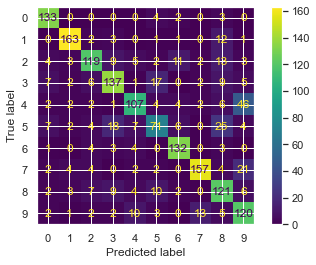

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       142
           1       0.91      0.89      0.90       183
           2       0.79      0.70      0.74       171
           3       0.75      0.74      0.74       186
           4       0.76      0.61      0.68       176
           5       0.62      0.49      0.55       144
           6       0.84      0.90      0.87       147
           7       0.89      0.80      0.84       196
           8       0.60      0.74      0.66       164
           9       0.58      0.76      0.66       158

    accuracy                           0.76      1667
   macro avg       0.76      0.76      0.75      1667
weighted avg       0.76      0.76      0.76      1667

Naive Bayes accuracy score: 0.755849
Number of mislabeled points out of a total 1667 points in Naive Bayes: 407


In [14]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(classification_report(y_test, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test.shape[0], (y_test != y_pred).sum()))
sisa_1.reset_learners()


In [15]:

#### Experiment I. Unlearn Requests on 40% of dataset

X_train_copy_1 = np.copy(X_train)
y_train_copy_1 = np.copy(y_train)
unlearn_rq_40 = sisa_1.gen_random_seq(size=2000)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_40, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_40, axis=0)
sisa_1.fit(unlearn_requests=unlearn_rq_40)
y_pred = sisa_1.predict(X_test, X_train_copy, y_train_copy)


Execution time for training Shard 0 : 1658 ms


/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


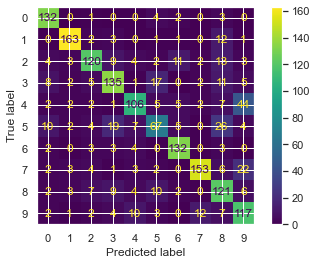

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       142
           1       0.91      0.89      0.90       183
           2       0.80      0.70      0.75       171
           3       0.73      0.73      0.73       186
           4       0.76      0.60      0.67       176
           5       0.60      0.47      0.53       144
           6       0.84      0.90      0.87       147
           7       0.89      0.78      0.83       196
           8       0.58      0.74      0.65       164
           9       0.58      0.74      0.65       158

    accuracy                           0.75      1667
   macro avg       0.75      0.75      0.74      1667
weighted avg       0.76      0.75      0.75      1667

Naive Bayes accuracy score: 0.747451
Number of mislabeled points out of a total 1667 points in Naive Bayes: 421


In [16]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(classification_report(y_test, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test.shape[0], (y_test != y_pred).sum()))
sisa_1.reset_learners()


In [17]:

#### Experiment I. Unlearn Requests on 60% of dataset
X_train_copy_1 = np.copy(X_train)
y_train_copy_1 = np.copy(y_train)
unlearn_rq_60 = sisa_1.gen_random_seq(size=3000)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_60, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_60, axis=0)
sisa_1.fit(unlearn_requests=unlearn_rq_60)
y_pred = sisa_1.predict(X_test, X_train_copy, y_train_copy)


Execution time for training Shard 0 : 1538 ms


/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


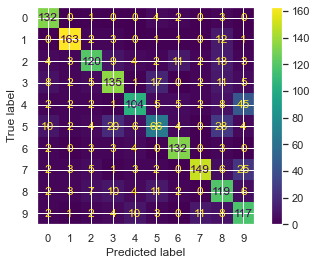

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       142
           1       0.91      0.89      0.90       183
           2       0.79      0.70      0.75       171
           3       0.73      0.73      0.73       186
           4       0.76      0.59      0.67       176
           5       0.59      0.46      0.52       144
           6       0.84      0.90      0.87       147
           7       0.90      0.76      0.82       196
           8       0.56      0.73      0.63       164
           9       0.57      0.74      0.64       158

    accuracy                           0.74      1667
   macro avg       0.75      0.74      0.74      1667
weighted avg       0.75      0.74      0.74      1667

Naive Bayes accuracy score: 0.742052
Number of mislabeled points out of a total 1667 points in Naive Bayes: 430


In [18]:


ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(classification_report(y_test, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test.shape[0], (y_test != y_pred).sum()))
sisa_1.reset_learners()


In [19]:

#### Experiment I. Unlearn Requests on 80% of dataset
X_train_copy_1 = np.copy(X_train)
y_train_copy_1 = np.copy(y_train)
unlearn_rq_80 = sisa_1.gen_random_seq(size=4000)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_80, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_80, axis=0)
sisa_1.fit(unlearn_requests=unlearn_rq_80)
y_pred = sisa_1.predict(X_test, X_train_copy, y_train_copy)


Execution time for training Shard 0 : 1513 ms


/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


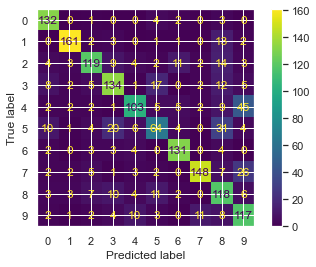

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       142
           1       0.92      0.88      0.90       183
           2       0.79      0.70      0.74       171
           3       0.72      0.72      0.72       186
           4       0.76      0.59      0.66       176
           5       0.59      0.44      0.51       144
           6       0.84      0.89      0.86       147
           7       0.90      0.76      0.82       196
           8       0.54      0.72      0.62       164
           9       0.56      0.74      0.64       158

    accuracy                           0.74      1667
   macro avg       0.74      0.74      0.73      1667
weighted avg       0.75      0.74      0.74      1667

Naive Bayes accuracy score: 0.736053
Number of mislabeled points out of a total 1667 points in Naive Bayes: 440


In [20]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(classification_report(y_test, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test.shape[0], (y_test != y_pred).sum()))
sisa_1.reset_learners()


In [21]:

### Experiment II. 3 Shards, 10 Slices
X_train_copy_1 = np.copy(X_train)
y_train_copy_1 = np.copy(y_train)
sisa_1 = SISA(X_train, y_train, shards=3, slices=10, seed=123)
sisa_1.fit()
y_pred = sisa_1.predict(X_test, X_train, y_train)


Execution time for training Shard 0 : 1739 ms
Execution time for training Shard 1 : 1734 ms
Execution time for training Shard 2 : 1747 ms


/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


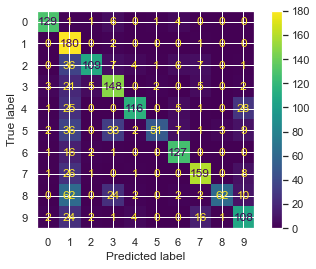

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       142
           1       0.42      0.98      0.59       183
           2       0.91      0.64      0.75       171
           3       0.67      0.80      0.73       186
           4       0.90      0.66      0.76       176
           5       0.93      0.35      0.51       144
           6       0.84      0.86      0.85       147
           7       0.83      0.81      0.82       196
           8       0.94      0.38      0.54       164
           9       0.65      0.68      0.67       158

    accuracy                           0.71      1667
   macro avg       0.80      0.71      0.71      1667
weighted avg       0.79      0.71      0.71      1667

Naive Bayes accuracy score: 0.713257
Number of mislabeled points out of a total 1667 points in Naive Bayes: 478


In [22]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(classification_report(y_test, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test.shape[0], (y_test != y_pred).sum()))


In [23]:

#### Experiment I. Unlearn Requests on 20% of dataset
X_train_copy_1 = np.copy(X_train)
y_train_copy_1 = np.copy(y_train)
unlearn_rq_20 = sisa_1.gen_random_seq(size=1000)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_20, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_20, axis=0)
sisa_1.fit(unlearn_requests=unlearn_rq_20)
y_pred = sisa_1.predict(X_test, X_train_copy, y_train_copy)


/Users/micneely/Desktop/sisa/sisa.py:80: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  affected_shards_x = np.array(self.affected_shards)


Execution time for training Shard 0 : 1390 ms
Execution time for training Shard 1 : 1568 ms
Execution time for training Shard 2 : 1244 ms


/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


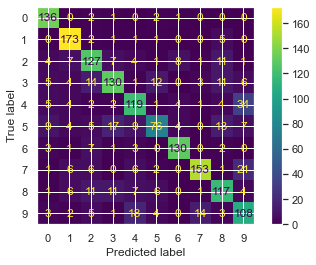

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       142
           1       0.84      0.95      0.89       183
           2       0.70      0.74      0.72       171
           3       0.76      0.70      0.73       186
           4       0.71      0.68      0.69       176
           5       0.72      0.53      0.61       144
           6       0.88      0.88      0.88       147
           7       0.88      0.78      0.83       196
           8       0.70      0.71      0.71       164
           9       0.60      0.68      0.64       158

    accuracy                           0.76      1667
   macro avg       0.76      0.76      0.76      1667
weighted avg       0.76      0.76      0.76      1667

Naive Bayes accuracy score: 0.761248
Number of mislabeled points out of a total 1667 points in Naive Bayes: 398


In [24]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(classification_report(y_test, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test.shape[0], (y_test != y_pred).sum()))
sisa_1.reset_learners()


In [25]:

#### Experiment I. Unlearn Requests on 40% of dataset
X_train_copy_1 = np.copy(X_train)
y_train_copy_1 = np.copy(y_train)
unlearn_rq_40 = sisa_1.gen_random_seq(size=2000)
start = datetime.datetime.now()
X_train_copy_1 = np.copy(X_train)
y_train_copy_1 = np.copy(y_train)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_40, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_40, axis=0)

sisa_1.fit(unlearn_requests=unlearn_rq_40)
y_pred = sisa_1.predict(X_test, X_train_copy, y_train_copy)


/Users/micneely/Desktop/sisa/sisa.py:80: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  affected_shards_x = np.array(self.affected_shards)


Execution time for training Shard 0 : 1291 ms
Execution time for training Shard 1 : 1689 ms
Execution time for training Shard 2 : 1465 ms


/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


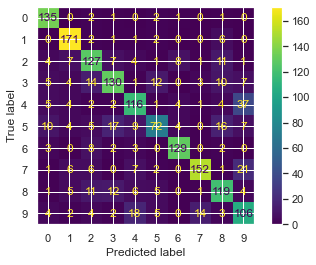

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       142
           1       0.84      0.93      0.89       183
           2       0.70      0.74      0.72       171
           3       0.75      0.70      0.72       186
           4       0.70      0.66      0.68       176
           5       0.71      0.50      0.59       144
           6       0.88      0.88      0.88       147
           7       0.88      0.78      0.83       196
           8       0.69      0.73      0.71       164
           9       0.58      0.67      0.62       158

    accuracy                           0.75      1667
   macro avg       0.75      0.75      0.75      1667
weighted avg       0.76      0.75      0.75      1667

Naive Bayes accuracy score: 0.754049
Number of mislabeled points out of a total 1667 points in Naive Bayes: 410


In [26]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(classification_report(y_test, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test.shape[0], (y_test != y_pred).sum()))
sisa_1.reset_learners()


In [27]:

#### Experiment I. Unlearn Requests on 60% of dataset
X_train_copy_1 = np.copy(X_train)
y_train_copy_1 = np.copy(y_train)
unlearn_rq_60 = sisa_1.gen_random_seq(size=3000)
X_train_copy_1 = np.copy(X_train)
y_train_copy_1 = np.copy(y_train)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_60, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_60, axis=0)
sisa_1.fit(unlearn_requests=unlearn_rq_60)
y_pred = sisa_1.predict(X_test, X_train_copy, y_train_copy)


/Users/micneely/Desktop/sisa/sisa.py:80: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  affected_shards_x = np.array(self.affected_shards)
/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


Execution time for training Shard 0 : 1392 ms
Execution time for training Shard 1 : 1247 ms
Execution time for training Shard 2 : 2227 ms


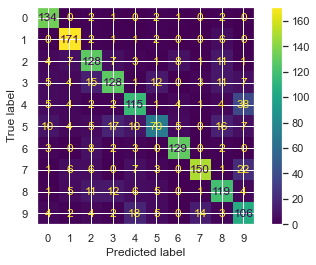

              precision    recall  f1-score   support

           0       0.80      0.94      0.87       142
           1       0.84      0.93      0.89       183
           2       0.70      0.75      0.72       171
           3       0.74      0.69      0.72       186
           4       0.70      0.65      0.68       176
           5       0.69      0.49      0.57       144
           6       0.88      0.88      0.88       147
           7       0.88      0.77      0.82       196
           8       0.68      0.73      0.70       164
           9       0.57      0.67      0.62       158

    accuracy                           0.75      1667
   macro avg       0.75      0.75      0.75      1667
weighted avg       0.75      0.75      0.75      1667

Naive Bayes accuracy score: 0.749850
Number of mislabeled points out of a total 1667 points in Naive Bayes: 417


In [28]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(classification_report(y_test, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test.shape[0], (y_test != y_pred).sum()))
sisa_1.reset_learners()


In [29]:

#### Experiment I. Unlearn Requests on 80% of dataset
X_train_copy_1 = np.copy(X_train)
y_train_copy_1 = np.copy(y_train)
unlearn_rq_80 = sisa_1.gen_random_seq(size=4000)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_80, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_80, axis=0)

sisa_1.fit(unlearn_requests=unlearn_rq_80)
y_pred = sisa_1.predict(X_test, X_train_copy, y_train_copy)


/Users/micneely/Desktop/sisa/sisa.py:80: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  affected_shards_x = np.array(self.affected_shards)


Execution time for training Shard 0 : 1384 ms
Execution time for training Shard 1 : 1369 ms
Execution time for training Shard 2 : 1225 ms


/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


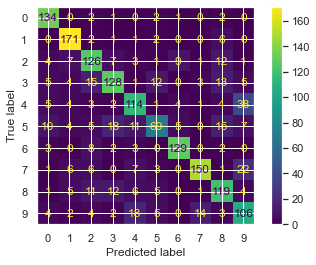

              precision    recall  f1-score   support

           0       0.80      0.94      0.87       142
           1       0.84      0.93      0.89       183
           2       0.69      0.74      0.71       171
           3       0.74      0.69      0.71       186
           4       0.70      0.65      0.67       176
           5       0.69      0.48      0.57       144
           6       0.87      0.88      0.87       147
           7       0.88      0.77      0.82       196
           8       0.67      0.73      0.70       164
           9       0.58      0.67      0.62       158

    accuracy                           0.75      1667
   macro avg       0.75      0.75      0.74      1667
weighted avg       0.75      0.75      0.74      1667

Naive Bayes accuracy score: 0.747451
Number of mislabeled points out of a total 1667 points in Naive Bayes: 421


In [30]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(classification_report(y_test, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test.shape[0], (y_test != y_pred).sum()))
sisa_1.reset_learners()


In [31]:

### Experiment III. 5 Shards, 10 Slices
sisa_1 = SISA(X_train, y_train, shards=5, slices=10, seed=123)
sisa_1.fit()
y_pred = sisa_1.predict(X_test, X_train, y_train)


/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


Execution time for training Shard 0 : 1735 ms
Execution time for training Shard 1 : 1732 ms
Execution time for training Shard 2 : 1725 ms
Execution time for training Shard 3 : 1728 ms
Execution time for training Shard 4 : 1736 ms


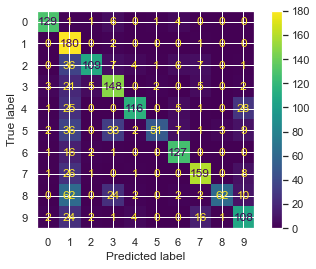

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       142
           1       0.42      0.98      0.59       183
           2       0.91      0.64      0.75       171
           3       0.67      0.80      0.73       186
           4       0.90      0.66      0.76       176
           5       0.93      0.35      0.51       144
           6       0.84      0.86      0.85       147
           7       0.83      0.81      0.82       196
           8       0.94      0.38      0.54       164
           9       0.65      0.68      0.67       158

    accuracy                           0.71      1667
   macro avg       0.80      0.71      0.71      1667
weighted avg       0.79      0.71      0.71      1667

Naive Bayes accuracy score: 0.713257
Number of mislabeled points out of a total 1667 points in Naive Bayes: 478


In [32]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(classification_report(y_test, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test.shape[0], (y_test != y_pred).sum()))


In [33]:

#### Experiment I. Unlearn Requests on 20% of dataset

unlearn_rq_20 = sisa_1.gen_random_seq(size=1000)

X_train_copy_1 = np.copy(X_train)
y_train_copy_1 = np.copy(y_train)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_20, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_20, axis=0)

sisa_1.fit(unlearn_requests=unlearn_rq_20)
y_pred = sisa_1.predict(X_test, X_train_copy, y_train_copy)


/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


Execution time for training Shard 0 : 1293 ms
Execution time for training Shard 1 : 1312 ms
Execution time for training Shard 2 : 1294 ms
Execution time for training Shard 3 : 1571 ms
Execution time for training Shard 4 : 1972 ms


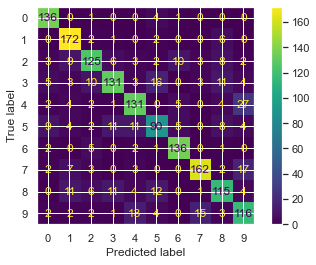

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       142
           1       0.81      0.94      0.87       183
           2       0.79      0.73      0.76       171
           3       0.81      0.70      0.75       186
           4       0.77      0.74      0.76       176
           5       0.69      0.62      0.65       144
           6       0.87      0.93      0.89       147
           7       0.88      0.83      0.85       196
           8       0.73      0.70      0.71       164
           9       0.67      0.73      0.70       158

    accuracy                           0.79      1667
   macro avg       0.79      0.79      0.79      1667
weighted avg       0.79      0.79      0.79      1667

Naive Bayes accuracy score: 0.788242
Number of mislabeled points out of a total 1667 points in Naive Bayes: 353


In [34]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(classification_report(y_test, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test.shape[0], (y_test != y_pred).sum()))
sisa_1.reset_learners()


In [35]:

#### Experiment I. Unlearn Requests on 40% of dataset
unlearn_rq_40 = sisa_1.gen_random_seq(size=2000)

X_train_copy_1 = np.copy(X_train)
y_train_copy_1 = np.copy(y_train)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_40, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_40, axis=0)

sisa_1.fit(unlearn_requests=unlearn_rq_40)
y_pred = sisa_1.predict(X_test, X_train_copy, y_train_copy)


/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


Execution time for training Shard 0 : 1884 ms
Execution time for training Shard 1 : 1344 ms
Execution time for training Shard 2 : 1307 ms
Execution time for training Shard 3 : 1352 ms
Execution time for training Shard 4 : 1317 ms


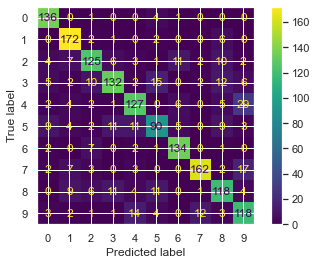

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       142
           1       0.83      0.94      0.88       183
           2       0.79      0.73      0.76       171
           3       0.81      0.71      0.76       186
           4       0.77      0.72      0.74       176
           5       0.70      0.62      0.66       144
           6       0.85      0.91      0.88       147
           7       0.91      0.83      0.86       196
           8       0.71      0.72      0.72       164
           9       0.66      0.75      0.70       158

    accuracy                           0.79      1667
   macro avg       0.79      0.79      0.79      1667
weighted avg       0.79      0.79      0.79      1667

Naive Bayes accuracy score: 0.788242
Number of mislabeled points out of a total 1667 points in Naive Bayes: 353


In [36]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(classification_report(y_test, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test.shape[0], (y_test != y_pred).sum()))
sisa_1.reset_learners()


In [37]:

#### Experiment I. Unlearn Requests on 60% of dataset

unlearn_rq_60 = sisa_1.gen_random_seq(size=3000)
X_train_copy_1 = np.copy(X_train)
y_train_copy_1 = np.copy(y_train)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_60, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_60, axis=0)


sisa_1.fit(unlearn_requests=unlearn_rq_60)
y_pred = sisa_1.predict(X_test, X_train_copy, y_train_copy)


/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


Execution time for training Shard 0 : 1308 ms
Execution time for training Shard 1 : 1330 ms
Execution time for training Shard 2 : 1179 ms
Execution time for training Shard 3 : 1303 ms
Execution time for training Shard 4 : 1305 ms


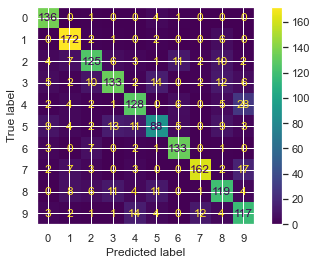

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       142
           1       0.83      0.94      0.88       183
           2       0.79      0.73      0.76       171
           3       0.80      0.72      0.76       186
           4       0.77      0.73      0.75       176
           5       0.70      0.61      0.65       144
           6       0.85      0.90      0.88       147
           7       0.91      0.83      0.86       196
           8       0.71      0.73      0.72       164
           9       0.66      0.74      0.70       158

    accuracy                           0.79      1667
   macro avg       0.78      0.79      0.78      1667
weighted avg       0.79      0.79      0.79      1667

Naive Bayes accuracy score: 0.787642
Number of mislabeled points out of a total 1667 points in Naive Bayes: 354


In [38]:


ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(classification_report(y_test, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test.shape[0], (y_test != y_pred).sum()))
sisa_1.reset_learners()


In [39]:

#### Experiment I. Unlearn Requests on 80% of dataset

unlearn_rq_80 = sisa_1.gen_random_seq(size=4000)

X_train_copy_1 = np.copy(X_train)
y_train_copy_1 = np.copy(y_train)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_80, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_80, axis=0)

sisa_1.fit(unlearn_requests=unlearn_rq_80)
y_pred = sisa_1.predict(X_test, X_train_copy, y_train_copy)


/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


Execution time for training Shard 0 : 1312 ms
Execution time for training Shard 1 : 1393 ms
Execution time for training Shard 2 : 1300 ms
Execution time for training Shard 3 : 1340 ms
Execution time for training Shard 4 : 1248 ms


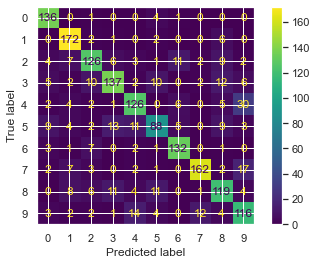

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       142
           1       0.83      0.94      0.88       183
           2       0.78      0.74      0.76       171
           3       0.81      0.74      0.77       186
           4       0.77      0.72      0.74       176
           5       0.72      0.61      0.66       144
           6       0.85      0.90      0.87       147
           7       0.91      0.83      0.86       196
           8       0.71      0.73      0.72       164
           9       0.65      0.73      0.69       158

    accuracy                           0.79      1667
   macro avg       0.79      0.79      0.79      1667
weighted avg       0.79      0.79      0.79      1667

Naive Bayes accuracy score: 0.788242
Number of mislabeled points out of a total 1667 points in Naive Bayes: 353


In [40]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(classification_report(y_test, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test.shape[0], (y_test != y_pred).sum()))
sisa_1.reset_learners()


In [7]:

### Experiment IV. 7 Shards, 10 Slices

sisa_1 = SISA(X_train, y_train, shards=7, slices=10, seed=123)
sisa_1.fit()
y_pred = sisa_1.predict(X_test, X_train, y_train)


/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


Execution time for training Shard 0 : 2085 ms
Execution time for training Shard 1 : 1765 ms
Execution time for training Shard 2 : 1767 ms
Execution time for training Shard 3 : 1784 ms
Execution time for training Shard 4 : 1765 ms
Execution time for training Shard 5 : 1763 ms
Execution time for training Shard 6 : 1759 ms


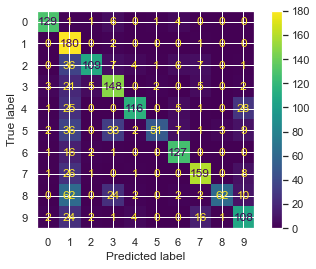

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       142
           1       0.42      0.98      0.59       183
           2       0.91      0.64      0.75       171
           3       0.67      0.80      0.73       186
           4       0.90      0.66      0.76       176
           5       0.93      0.35      0.51       144
           6       0.84      0.86      0.85       147
           7       0.83      0.81      0.82       196
           8       0.94      0.38      0.54       164
           9       0.65      0.68      0.67       158

    accuracy                           0.71      1667
   macro avg       0.80      0.71      0.71      1667
weighted avg       0.79      0.71      0.71      1667

Naive Bayes accuracy score: 0.713257
Number of mislabeled points out of a total 1667 points in Naive Bayes: 478


In [8]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(classification_report(y_test, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test.shape[0], (y_test != y_pred).sum()))


In [ ]:

#### Experiment I. Unlearn Requests on 20% of dataset

unlearn_rq_20 = sisa_1.gen_random_seq(size=1000)

X_train_copy_1 = np.copy(X_train)
y_train_copy_1 = np.copy(y_train)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_20, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_20, axis=0)

sisa_1.fit(unlearn_requests=unlearn_rq_20)
y_pred = sisa_1.predict(X_test, X_train_copy, y_train_copy)


In [ ]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(classification_report(y_test, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test.shape[0], (y_test != y_pred).sum()))
sisa_1.reset_learners()


In [ ]:

#### Experiment I. Unlearn Requests on 40% of dataset
unlearn_rq_40 = sisa_1.gen_random_seq(size=2000)

X_train_copy_1 = np.copy(X_train)
y_train_copy_1 = np.copy(y_train)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_40, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_40, axis=0)


In [ ]:

sisa_1.fit(unlearn_requests=unlearn_rq_40)
y_pred = sisa_1.predict(X_test, X_train_copy, y_train_copy)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(classification_report(y_test, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test.shape[0], (y_test != y_pred).sum()))
sisa_1.reset_learners()


In [ ]:

#### Experiment I. Unlearn Requests on 60% of dataset

unlearn_rq_60 = sisa_1.gen_random_seq(size=3000)

X_train_copy_1 = np.copy(X_train)
y_train_copy_1 = np.copy(y_train)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_60, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_60, axis=0)


sisa_1.fit(unlearn_requests=unlearn_rq_60)
y_pred = sisa_1.predict(X_test, X_train_copy, y_train_copy)


In [ ]:


ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(classification_report(y_test, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test.shape[0], (y_test != y_pred).sum()))
sisa_1.reset_learners()


In [ ]:

#### Experiment I. Unlearn Requests on 80% of dataset

unlearn_rq_80 = sisa_1.gen_random_seq(size=4000)

X_train_copy_1 = np.copy(X_train)
y_train_copy_1 = np.copy(y_train)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_80, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_80, axis=0)

sisa_1.fit(unlearn_requests=unlearn_rq_80)
y_pred = sisa_1.predict(X_test, X_train_copy, y_train_copy)


In [ ]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(classification_report(y_test, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test.shape[0], (y_test != y_pred).sum()))
sisa_1.reset_learners()


In [ ]:

### Experiment V. 9 Shards, 10 Slices

sisa_1 = SISA(X_train, y_train, shards=9, slices=10, seed=123)
sisa_1.fit()
y_pred = sisa_1.predict(X_test, X_train, y_train)


In [ ]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(classification_report(y_test, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test.shape[0], (y_test != y_pred).sum()))


In [ ]:

#### Experiment I. Unlearn Requests on 20% of dataset
unlearn_rq_20 = sisa_1.gen_random_seq(size=1000)

X_train_copy_1 = np.copy(X_train)
y_train_copy_1 = np.copy(y_train)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_40, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_40, axis=0)

sisa_1.fit(unlearn_requests=unlearn_rq_20)
y_pred = sisa_1.predict(X_test, X_train_copy, y_train_copy)


In [ ]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(classification_report(y_test, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test.shape[0], (y_test != y_pred).sum()))
sisa_1.reset_learners()


In [ ]:

#### Experiment I. Unlearn Requests on 40% of dataset
unlearn_rq_40 = sisa_1.gen_random_seq(size=2000)
X_train_copy_1 = np.copy(X_train)
y_train_copy_1 = np.copy(y_train)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_40, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_40, axis=0)

sisa_1.fit(unlearn_requests=unlearn_rq_40)
y_pred = sisa_1.predict(X_test, X_train_copy, y_train_copy)


In [ ]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(classification_report(y_test, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test.shape[0], (y_test != y_pred).sum()))
sisa_1.reset_learners()


In [ ]:

#### Experiment I. Unlearn Requests on 60% of dataset

unlearn_rq_60 = sisa_1.gen_random_seq(size=3000)

X_train_copy_1 = np.copy(X_train)
y_train_copy_1 = np.copy(y_train)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_60, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_60, axis=0)

sisa_1.fit(unlearn_requests=unlearn_rq_60)
y_pred = sisa_1.predict(X_test, X_train_copy, y_train_copy)



In [ ]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(classification_report(y_test, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test.shape[0], (y_test != y_pred).sum()))
sisa_1.reset_learners()


In [ ]:

#### Experiment I. Unlearn Requests on 80% of dataset

unlearn_rq_80 = sisa_1.gen_random_seq(size=4000)

X_train_copy_1 = np.copy(X_train)
y_train_copy_1 = np.copy(y_train)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_80, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_80, axis=0)
sisa_1.fit(unlearn_requests=unlearn_rq_80)
y_pred = sisa_1.predict(X_test, X_train_copy, y_train_copy)


In [ ]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(classification_report(y_test, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test.shape[0], (y_test != y_pred).sum()))
sisa_1.reset_learners()